Some Resources I have actully found useful - 

 - [Neural Network and Deep Learning - Michael Nielsen](http://neuralnetworksanddeeplearning.com/)
 - [A Step-by-Step Backpropagation Example - Matt Mazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
 - [A Gentle Introduction to Neural Networks for Machine Learning](https://www.codementor.io/james_aka_yale/a-gentle-introduction-to-neural-networks-for-machine-learning-hkijvz7lp) - This link provides brief overview of various types of NN such as CNN, RNN and GAN.

---

We have that - 

z = $w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$

Where z is calculated for a given sample. 

Now let us define a activation function such that -  

$$ \phi(z) = 
\begin{pmatrix}
1 & if z \geq \theta \\
-1 & otherwise
\end{pmatrix}
\quad
$$

For simplicity, we can rewrite above equation by bring $\theta$ to left hand side and define a weight-zero as -$\theta$ and $x_0$ as 1. We get - 

$$z = w_0x_0+w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$$ 

and 

$$ \phi(z) = 
\begin{pmatrix}
1 & if z \geq 0 \\
-1 & otherwise
\end{pmatrix}
\quad
$$

Here, **$\phi(z)$** is our activation function. 

The whole idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly
simple and can be summarized by the following steps:
1. Initialize the weights to 0 or small random numbers.
2. For each training sample $x(i)$ perform the following steps:
  1. Compute the output value $y^ˆ$ .
  2. Update the weights.
Here, the output value is the class label.

See this illustration of perceptron (shown below) where $\phi(z) = z$. 

![](images/perceptron.png)

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. If the two classes can't be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (epochs) and/or a threshold for the number of tolerated misclassifications—the perceptron would never stop updating the weights otherwise.

#### Online and Error Driven Algorithm

First, it is online. This means that instead of considering the entire data set at the same time, it only ever looks at one example. It processes that example and then goes on to the next one. Second, it is error driven. This means that, so long as it is doing well, it doesn’t bother updating its parameters.

#### Perceptron vs Sigmoid Neuron

In perceptron, output values can either be 0 or 1. However, in case of sigmoid neuron, input/output can take any value in the range [0,1]. 

Also, perceptron curve is essentially a step function. On the other hand, sigmoid function follows S-shaped function with some midway threshold value (usually .5). 

#### Simple NN and Backpropagation 

Let us consider a NN with 2 input neurons (i1 and i2), one hidden layer with 2 neurons (h1 and h2) and 2 output neurons (o1 and o2). 

Let input be `[.05, .10]` and desired output be `[.01, .99]`. Bias for hidden layer (b1) = `[.35]` and for output layer (b2) = `[.60]`

Weights are as follows = 
```
[w1, w2, w3, w4] = [.15, .20, .25, .30] #for first layer
[w5, w6, w7, w8] = [.40, .45, .50, .55] #for second layer
```

For this NN, we'll use logistic function $f(x) = \frac{1}{1 + exp(-x)}$ as our activation function.

Scipy packages has a function for caclucating the value for logistic function - 

```
from scipy.special import expit
expit(.3924999999) # output - 0.59688437823570573
```

![](images\nn.png)

In [1]:
import numpy as np
from scipy.special import expit

i1, i2 = [.05, .1]
target1 = .01
target2 = .99

lr = .5

w1,w2,w3,w4 = [.15, .20, .25, .30]
w5, w6, w7, w8 = [.40, .45, .50, .55]

b1 = .35
b2 = .60


ih1 = np.dot([i1,i2],[w1,w2])+ b1  #input for the first hidden layer neuron
ih2 = np.dot([i1,i2],[w3,w4]) + b1  #input for the second hidden layer neuron

oh1 = expit(ih1)     #applying activation function to get the o/p of firt hidden layer neuron
oh2 = expit(ih2)     #applying activation function to get

#oh1, oh2  these will be used as input for output neurons

io1 = np.dot([oh1, oh2], [w5, w6]) + b2
io2 = np.dot([oh1, oh2], [ w7, w8]) + b2 

out1 = expit(io1)
out2 = expit(io2)

out1, out2

(0.7513650695523157, 0.7729284653214625)

Now we caclucate the error using following formula - 

$E_{total} = E_1 + E_2 =  \Sigma\frac{1}{2}(Target - output)^2$

In [2]:
error_total = .5 *( (target1 - out1)**2 + (target2 - out2)**2)
error_total

0.2983711087600027

##### The Backwards Pass

Our goal with backpropagation is to update each of the weights in the network so that they cause the actual output to be closer the target output, thereby minimizing the error for each output neuron and the network as a whole.

The only values we can update in order to minimize the error are the weights and biases.

For this we calculate $\frac{\partial E_{total}}{\partial w}$ which tells us how much change in `w` affects $E_{total}$. We do this for each weight

We have seen above that $E_{total}$ *directly* depends on `out1` and `out2` which in turn depend on `io1` and `i02` which in turn depend on weights `w5`,`w6`, `w7`, `w8`. This means we have to use chain rule like below - 

$\frac{\partial E_{total}}{\partial {w_5}}$ = $\frac{\partial E_{total}}{\partial out1}*\frac{\partial out1}{\partial io1} * \frac{\partial io1}{\partial {w_5}} $

Now 
$$\frac{\partial E_{total}}{\partial {out1}} = 2* \frac{1}{2}(target1 - out1)^{2-1}*(-1) + 0 = out1 - target1$$

Now we have to calculate $\frac{\partial out1}{\partial io1}$. Here `out1` was actually a logistic function (our activation function) $f(x) = \frac{1}{1 + exp(-x)}$ . The derivative of logistic function is - 

If 

$y = \frac{1}{1 + exp(-x)}$ 

then 

$\frac{\partial y}{\partial x} = y(1 - y)$

This gives

$$\frac{\partial out1}{\partial {io1}} = out1(1 - out1)$$

Finally, we calculate $\frac{\partial io1}{\partial w5}$. We know that - $io1 = w5*oh1 +w6*oh2 + b2$

Using above, we get - 

$$\frac{\partial io1}{\partial w5} = oh1 $$

Following the same method implemented above, we can calcule the gradient wrt w6, w7 and w8. 

---
Now, we also calculate the gradient wrt w1, w2,w3 and w4

$\frac{\partial E_{total}}{\partial {w_1}}$ = $\frac{\partial E_{total}}{\partial oh_1}*\frac{\partial oh_1}{\partial ih_1} * \frac{\partial ih_1}{\partial {w_1}}$

Note that unlike earlier, the first derivative on LHS is wrt `oh1` rather than `out1`. Here, both `out1` and `out2` *depend* on `w1` (via `oh1`). So basically $E_{total}$ depends on `oh1` and `oh1` in turn depends on `w1`. This explains the difference between calculations of $\frac{\partial E_{total}}{\partial w_7}$ and $\frac{\partial E_{total}}{\partial w_1}$  

$\frac{\partial E_{total}}{\partial oh_1} = \frac{\partial E1}{\partial oh_1} +\frac{\partial E2}{\partial oh_1} $

$\frac{\partial E1}{\partial oh_1} = .5*2*(target1-out1)*(-1)*\frac{\partial out1}{\partial oh_1}$

$= (-1)*(target1-out1)*\frac{\partial out1}{\partial io_1}*\frac{\partial io_1}{\partial oh_1}$

$= (-1)*(target1-out1)*out1*(1-out1)*\frac{\partial io_1}{\partial oh_1}$

$ = (-1)*(target1-out1)*out1*(1-out1)*w_5$

Now, to calculate $\frac{\partial E2}{\partial oh_1}$

$\frac{\partial E2}{\partial oh_1} = .5*2*(target2-out2)*(-1)*\frac{\partial out2}{\partial oh_1}$

$= (-1)*(target2-out2)*\frac{\partial out2}{\partial io_2}*\frac{\partial io_2}{\partial oh_1}$

$= (-1)*(target2-out2)*out2(1-out2)*\frac{\partial io_2}{\partial oh_1}$

$= (-1)*(target2-out2)*out2(1-out2)*w_7$

In [3]:
dw5 = (out1 - target1)*(out1*(1-out1))* oh1 #gradient wrt 5

In [4]:
#using learning rate = .5, w5 is updated as below
w5_new = w5 - (lr*dw5)
w5_new

0.35891647971788465

In [5]:
dw6 = (out1 - target1)*(out1*(1-out1))* oh2 #derivative of error wrt w6

In [6]:
w6_new = w6 - (lr*dw6)
w6_new

0.4086661860762334

In [7]:
dw7 = (out2-target2)*(out2*(1-out2))*oh1 #derivative of error wrt w7
w7_new = w7 - (lr*dw7)
w7_new

0.5113012702387375

In [8]:
dw8 = (out2-target2)*(out2*(1-out2))*oh2 #derivative of error wrt w8
w8_new = w8 - (lr*dw8)
w8_new

0.5613701211079891

In [9]:
e1 =(-1)*(target1 - out1)*(out1*(1-out1))*.4 # de1/doh1

In [10]:
e2= (-1)*(target2-out2)*(out2*(1-out2))*.5  #de2/doh1

In [11]:
dw1 = (e1+e2)*(oh1*(1-oh1)*.05) #derivative of error wrt w1
dw1

0.0004385677344743468

In [12]:
w1_new = w1 -(lr*dw1)
w1_new

0.1497807161327628

In [13]:
dw2 = (e1+e2)*(oh1*(1-oh1)*.1) #derivative of error wrt w1
w2_new = w2 - (lr*dw2)
w2_new

0.19956143226552567

In [14]:
x1 = .5*2*(-1)*(target1-out1)*out1*(1-out1)*w6

x2 = .5*2*(-1)*(target2-out2)*out2*(1-out2)*w8
dw3 = (x1+x2)*(oh2*(1-oh2))*i1
dw3

0.0004977127352608599

In [15]:
w3_neww = w3 - (lr*dw3)
w3_neww

0.24975114363236958

In [16]:
x1 = .5*2*(-1)*(target1-out1)*out1*(1-out1)*w6
x2 = .5*2*(-1)*(target2-out2)*out2*(1-out2)*w8
dw4 = (x1+x2)*(oh2*(1-oh2))*i2
dw4

0.0009954254705217198

In [17]:
w4 - (lr*dw4)

0.29950228726473915

Let us put it all together. 

In [18]:
import numpy as np
from scipy.special import expit


def nn(niter):
    i1, i2 = [.05, .1]
    target1, target2 = [.01, .99]
    lr = .5
    b1, b2 = [.35, .60]
    w1,w2,w3,w4 = [.15, .20, .25, .30]
    w5, w6, w7, w8 = [.40, .45, .50, .55]
    
    n = 0
    while n <= niter:
        ih1 = np.dot([i1,i2],[w1,w2])+ b1  #input for the first hidden layer neuron
        ih2 = np.dot([i1,i2],[w3,w4]) + b1  #input for the second hidden layer neuron

        oh1 = expit(ih1)     #applying activation function to get the o/p of firt hidden layer neuron
        oh2 = expit(ih2)     #applying activation function to get

#oh1, oh2 will be used as input for output neurons

        io1 = np.dot([oh1, oh2], [w5, w6]) + b2
        io2 = np.dot([oh1, oh2], [ w7, w8]) + b2 

        out1 = expit(io1)
        out2 = expit(io2)

        dw5 = (out1 - target1)*(out1*(1-out1))* oh1
        dw6 = (out1 - target1)*(out1*(1-out1))* oh2
        dw7 = (out2-target2)*(out2*(1-out2))*oh1
        dw8 = (out2-target2)*(out2*(1-out2))*oh2

        e1 =(-1)*(target1 - out1)*(out1*(1-out1))*w5
        e2= (-1)*(target2-out2)*(out2*(1-out2))*w7
        dw1 = (e1+e2)*(oh1*(1-oh1)*i1)
        dw2 = (e1+e2)*(oh1*(1-oh1)*i2)
        x1 = .5*2*(-1)*(target1-out1)*out1*(1-out1)*w6
        x2 = .5*2*(-1)*(target2-out2)*out2*(1-out2)*w8
        dw3 = (x1+x2)*(oh2*(1-oh2))*i1
        dw4 = (x1+x2)*(oh2*(1-oh2))*i2

        w1 = w1 - (lr*dw1)
        w2 = w2 - (lr*dw2)
        w3 = w3 - (lr*dw3)
        w4 = w4 - (lr*dw4)
        w5 = w5 - (lr*dw5)
        w6 = w6 - (lr*dw6)
        w7 = w7 - (lr*dw7)
        w8 = w8 - (lr*dw8)
        n=n+1

    print(out1, out2)

In [19]:
nn(60000)

0.010403941552817382 0.9895836064583369


#### Scikit-Learn MLP Classifier

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

nn = MLPClassifier(solver='lbfgs')
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

Note that `activation` keyword can take one of following values - (relu, tanh, identity, logistic). This is the activation function for hidden layers. 

  - `identity`, no-op activation, useful to implement linear bottleneck, returns $f(x) = x$
  - `logistic`, the logistic sigmoid function, returns $f(x) = \frac{1}{1 + exp(-x)}$.
  - `tanh`, the hyperbolic tan function, returns $f(x) = tanh(x)$.
  - `relu`, the rectified linear unit function, returns $f(x) = max(0, x)$

Also, `solver` keyword can take one of these values - (`lbfgs`, `sgd`, `adam`). Default is `adam`

In [26]:
>>> from sklearn.datasets import fetch_mldata
>>> mnist = fetch_mldata('MNIST original')

#second command raised OSError few times. It was because internet speed was erratic and downloaded data got corrupted.

C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
mnist.data.shape, mnist.keys(), mnist.COL_NAMES

((70000, 784),
 dict_keys(['DESCR', 'COL_NAMES', 'target', 'data']),
 ['label', 'data'])

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data, mnist.target)

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MLPClassifier(hidden_layer_sizes=(150,))
model.fit(xtrain, ytrain)
ypredict = model.predict(xtest)

Above we set the value of `hidden_layer_sizes` to (150,). The default value is (100,). Increasing this value has improved the results by about 2% (from .945 to .965).  

In [30]:
accuracy_score(ytest, ypredict)

0.9678285714285715

In [31]:
model.score(xtest, ytest)


0.9678285714285715

In [32]:
mat = confusion_matrix(ytest,ypredict)

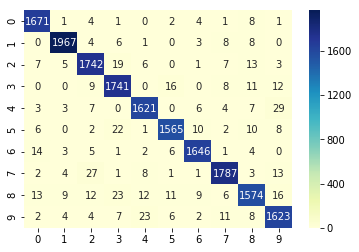

In [33]:
import seaborn as sns
sns.heatmap(mat, annot = True, fmt='d', cbar = True, cmap = 'YlGnBu')

In [34]:
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1693
         1.0       0.99      0.98      0.99      1997
         2.0       0.96      0.97      0.96      1803
         3.0       0.96      0.97      0.96      1797
         4.0       0.97      0.96      0.97      1680
         5.0       0.97      0.96      0.97      1626
         6.0       0.98      0.98      0.98      1682
         7.0       0.97      0.97      0.97      1847
         8.0       0.96      0.93      0.95      1685
         9.0       0.95      0.96      0.96      1690

   micro avg       0.97      0.97      0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In above report, sample column shows the number of respective labels in ytest. This means, `ytest` has 1711 samples for class '0' and 1950 samples for class '1'.


Let us test the GaussianNB classifier for the same data -

In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
ypred = gnb.predict(xtest)

In [37]:
gnb.score(xtest, ytest)

0.5465714285714286

In [38]:
accuracy_score(ytest, ypred)

0.5465714285714286

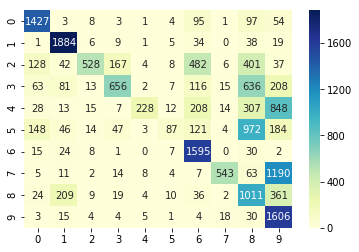

In [39]:
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat, annot = True, fmt='d', cbar = True, cmap = 'YlGnBu')

We see that the performance of GaussianNB is far more worse. In fact, our MLPClassifier actually performed very well even with the default hyperparameters values and we were able to improve the result by increasing the number of neurons in hidden layers. 

#### Using `cross_val_score` on training data

In [40]:

from sklearn.model_selection import cross_val_score
model = MLPClassifier(hidden_layer_sizes=(150,))
cross_val_score(model, xtrain, ytrain, cv = 5)

array([0.96515281, 0.96781565, 0.96542857, 0.96685399, 0.96875   ])

In [41]:
import numpy as np
a = np.array([0.96277609,  0.94916222,  0.95495238,  0.95922256,  0.95636433])
a

array([0.96277609, 0.94916222, 0.95495238, 0.95922256, 0.95636433])

In [42]:
a.mean()

0.956495516

In [43]:
model.hidden_layer_sizes


(150,)

#### Pure Python implementation of NN

Following is the implementation of NN from scratch. Taken from Sebastian book. 

In [1]:
###### from Sebastian Rascheka book

import numpy as np
from scipy.special import expit
import sys

class NeuralNetMLP(object):

    def __init__(self, n_output, n_features, n_hidden=30, l1=0.0, l2=0.0, epochs=500, eta=0.001,alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
    
    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    
    def _initialize_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
    # expit is equivalent to 1.0/(1.0 + np.exp(-z))
        return expit(z)
    
    def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2)+ np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum()+ np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
# backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

# regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))
        return grad1, grad2

    def predict(self, X):
        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):
        # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)
            if print_progress:
                 sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                 sys.stderr.flush()

            if self.shuffle: #index shuffling
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:,idx]
            
            mini = np.array_split(range(y_data.shape[0]), self.minibatches) #partitions of index

            for idx in mini:
# feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx], output=a3, w1=self.w1, w2=self.w2)
                self.cost_.append(cost)

# compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2, y_enc=y_enc[:, idx], w1=self.w1, w2=self.w2)
# update weights
                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2
        return self


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

nn = NeuralNetMLP(n_output=3, n_features=X_train.shape[1], n_hidden=13,
                  l2=0.0,l1=0.0,epochs=1000, eta=0.001, alpha=0.001,                         
                  decrease_const=0.00001, shuffle=True, minibatches=1, random_state=1)


In [4]:
nn.fit(X_train, y_train, print_progress=True)


Epoch: 1000/1000

In [5]:
y_t_pred = nn.predict(X_train)
acc = np.sum(y_train == y_t_pred, axis=0) / X_train.shape[0]
acc

0.9732142857142857

In [6]:
y_pred = nn.predict(X_test)

In [7]:
acc = np.sum(y_test == y_pred, axis=0) / X_test.shape[0]
acc

0.9736842105263158

##### Stripped Down Non OOP Version

In [8]:
# from Sebastian Rascheka book

import numpy as np
from scipy.special import expit
import sys

np.random.seed(1)
    
def _encode_labels(y, k):
    onehot = np.zeros((k, y.shape[0]))
    for idx, val in enumerate(y):
        onehot[val, idx] = 1.0
    return onehot
    

def _sigmoid(z):
    # expit is equivalent to 1.0/(1.0 + np.exp(-z))
    return expit(z)
    
def _sigmoid_gradient(z):
        sg = _sigmoid(z)
        return sg * (1 - sg)

def _add_bias_unit(X, how='column'):
    if how == 'column':
        X_new = np.ones((X.shape[0], X.shape[1]+1))
        X_new[:, 1:] = X
    elif how == 'row':
        X_new = np.ones((X.shape[0]+1, X.shape[1]))
        X_new[1:, :] = X
    else:
        raise AttributeError('`how` must be `column` or `row`')
    return X_new

def _feedforward(X, w1, w2):
    a1 = _add_bias_unit(X, how='column')
    z2 = w1.dot(a1.T)
    a2 = _sigmoid(z2)
    a2 = _add_bias_unit(a2, how='row')
    z3 = w2.dot(a2)
    a3 = _sigmoid(z3)
    return a1, z2, a2, z3, a3

def _get_cost(y_enc, output, w1, w2):
    term1 = -y_enc * (np.log(output))
    term2 = (1 - y_enc) * np.log(1 - output)
    cost = np.sum(term1 - term2)
    return cost

def _get_gradient(a1, a2, a3, z2, y_enc, w1, w2):
# backpropagation
    sigma3 = a3 - y_enc
    z2 = _add_bias_unit(z2, how='row')
    sigma2 = w2.T.dot(sigma3) * _sigmoid_gradient(z2)
    sigma2 = sigma2[1:, :]
    grad1 = sigma2.dot(a1)
    grad2 = sigma3.dot(a2.T)

    return grad1, grad2

def predict(X):
    a1, z2, a2, z3, a3 = _feedforward(X, w1, w2)
    y_pred = np.argmax(z3, axis=0)
    return y_pred

def fit(X, y, n_output=3, n_features=4, n_hidden=15, epochs=1000, eta=0.001, alpha=0.001,                         
                  decrease_const=0.00001, shuffle=True, minibatches=3, random_state=1, print_progress = True):
    cost_ = []
    X_data, y_data = X.copy(), y.copy()
    y_enc = _encode_labels(y, n_output)
    
    w1 = np.random.uniform(-1.0, 1.0, size=n_hidden*(n_features + 1))
    w1 = w1.reshape(n_hidden, n_features + 1)
    w2 = np.random.uniform(-1.0, 1.0, size=n_output*(n_hidden + 1))
    w2 = w2.reshape(n_output, n_hidden + 1)

    delta_w1_prev = np.zeros(w1.shape)
    delta_w2_prev = np.zeros(w2.shape)

    for i in range(epochs):
        # adaptive learning rate
        eta /= (1 + decrease_const*i)
        if print_progress:
            sys.stderr.write('\rEpoch: %d/%d' % (i+1, epochs))
            sys.stderr.flush()

        if shuffle: #index shuffling
            idx = np.random.permutation(y_data.shape[0])
            X_data, y_enc = X_data[idx], y_enc[:,idx]
            
        mini = np.array_split(range(y_data.shape[0]), minibatches) #partitions of index

        for idx in mini:
# feedforward
            a1, z2, a2, z3, a3 = _feedforward(X_data[idx], w1, w2)
            cost = _get_cost(y_enc=y_enc[:, idx], output=a3, w1=w1, w2=w2)
            cost_.append(cost)

# compute gradient via backpropagation
            grad1, grad2 = _get_gradient(a1=a1, a2=a2,a3=a3, z2=z2, y_enc=y_enc[:, idx], w1=w1, w2=w2)
# update weights
            delta_w1, delta_w2 = eta * grad1, eta * grad2
            w1 -= (delta_w1 + (alpha * delta_w1_prev))
            w2 -= (delta_w2 + (alpha * delta_w2_prev))
            delta_w1_prev, delta_w2_prev = delta_w1, delta_w2
    
    return w1, w2


In [9]:
w1, w2 = fit(X_train, y_train, print_progress = True)
y_pred = predict(X_test)

acc = np.sum(y_test == y_pred, axis=0) / X_test.shape[0]
acc


Epoch: 1000/1000

0.9736842105263158

In [14]:
yy = predict(X_train)
acc = np.sum(y_train == yy, axis=0) / X_train.shape[0]
acc

0.9642857142857143

In [10]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
from sklearn.model_selection import train_test_split
mnist.target = mnist.target.astype(int)
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data, mnist.target, stratify = mnist.target)

w1, w2 = fit(xtrain, ytrain, n_output=10, n_features=784, n_hidden=100, print_progress = True)
y_pred = predict(xtest)

acc = np.sum(ytest == y_pred, axis=0) / xtest.shape[0]
acc

Epoch: 1/1000C:\miniconda3\envs\data\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
C:\miniconda3\envs\data\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
Epoch: 4/1000

KeyboardInterrupt: 

In [11]:
nn = NeuralNetMLP(n_output=10, n_features=xtrain.shape[1], n_hidden=100,
                  l2=0.0,l1=0.0,epochs=1000, eta=0.001, alpha=0.001,                         
                  decrease_const=0.00001, shuffle=True, minibatches=1, random_state=1)

nn.fit(xtrain, ytrain, print_progress=True)

Epoch: 2/1000

MemoryError: 

In [4]:
yy = predict(xtrain)
acc = np.sum(ytrain == yy, axis=0) / xtrain.shape[0]
acc

0.11413333333333334

In [18]:
nn = NeuralNetMLP(n_output=10, n_features=784, n_hidden=100,
                  l2=0.0,l1=0.0,epochs=1000, eta=0.001, alpha=0.001,                         
                  decrease_const=0.00001, shuffle=True, minibatches=2, random_state=1)

In [19]:
nn.fit(xtrain, ytrain, print_progress = True)

Epoch: 1/1000C:\miniconda3\envs\data\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log
C:\miniconda3\envs\data\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in multiply
Epoch: 1000/1000

In [20]:
y_pred = nn.predict(xtest)

In [21]:
acc = np.sum(ytest == y_pred, axis=0) / xtest.shape[0]
acc

0.11262857142857143